# **Alucar - Analisando as vendas**

In [156]:
import pandas as pd

In [157]:
alucar = pd.read_csv('alucar.csv')

In [158]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [159]:
print('Quantidade de linhas e colunas: ', alucar.shape)

Quantidade de linhas e colunas:  (24, 2)


In [160]:
print('Quantidade de dados nulos:', alucar.isna().sum().sum())

Quantidade de dados nulos: 0


In [161]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

In [162]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [163]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

In [164]:
print(sns.__version__)

0.11.1


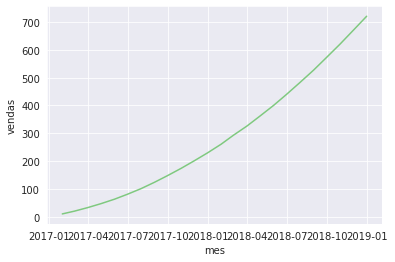

In [165]:
x = 'mes'
y = 'vendas'
data = alucar
sns.lineplot(x=x,y=y,data=data)

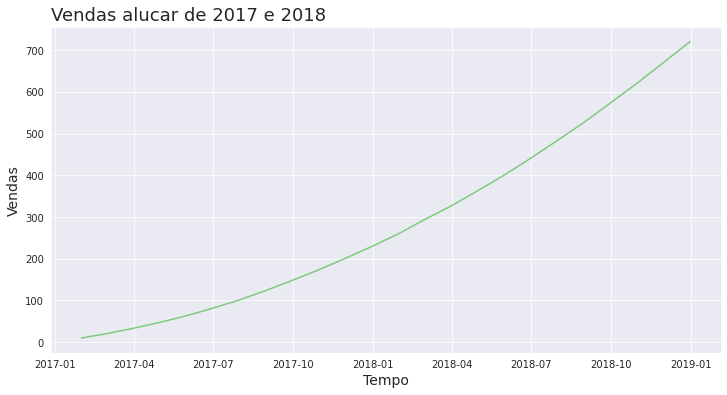

In [166]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
x = 'mes'
y = 'vendas'
data = alucar
ax = sns.lineplot(x=x,y=y,data=data)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

In [167]:
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


In [168]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


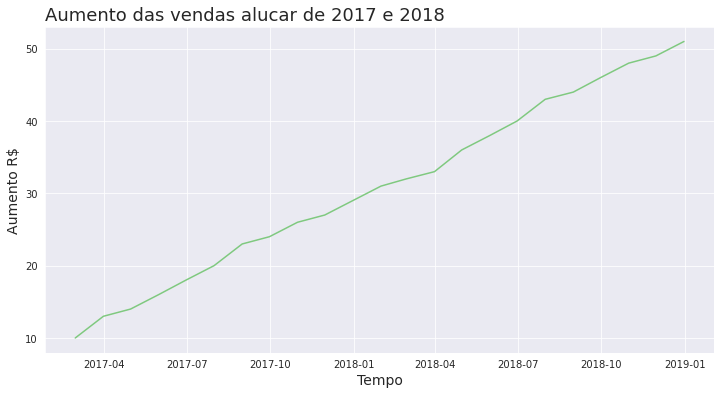

In [169]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
x = 'mes'
y = 'aumento'
data = alucar
ax = sns.lineplot(x=x,y=y,data=data)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento R$', fontsize=14)
ax = ax

In [170]:
def plotar(titulo, labelx, labely, x,y, data):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  data = data
  ax = sns.lineplot(x=x,y=y,data=data)
  ax.figure.set_size_inches(12,6)
  ax.set_title(titulo, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize=14)
  ax.set_ylabel(labely, fontsize=14)
  ax = ax

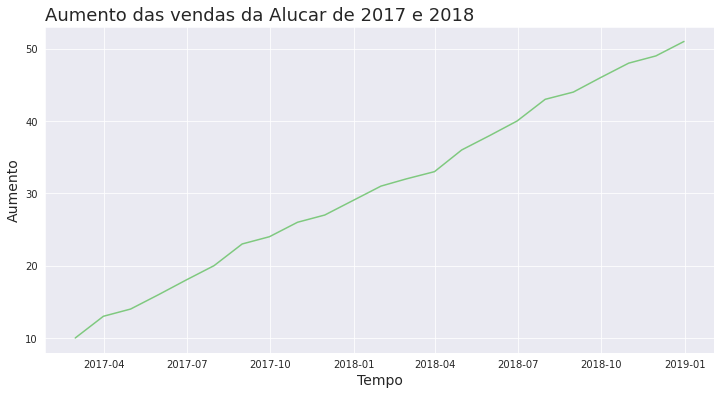

In [171]:
plotar('Aumento das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aumento', 'mes', 'aumento', alucar)

In [172]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


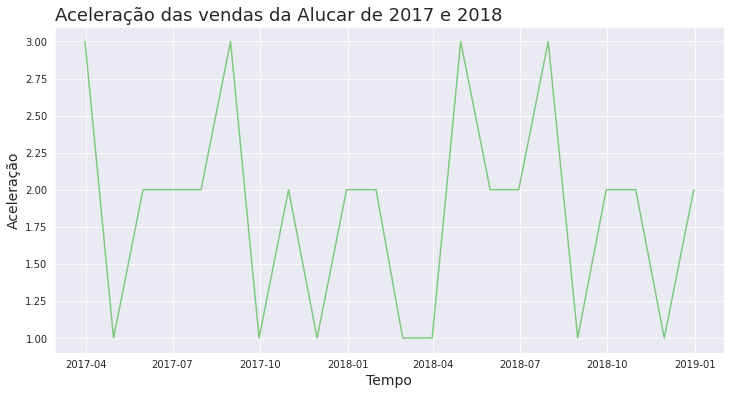

In [173]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

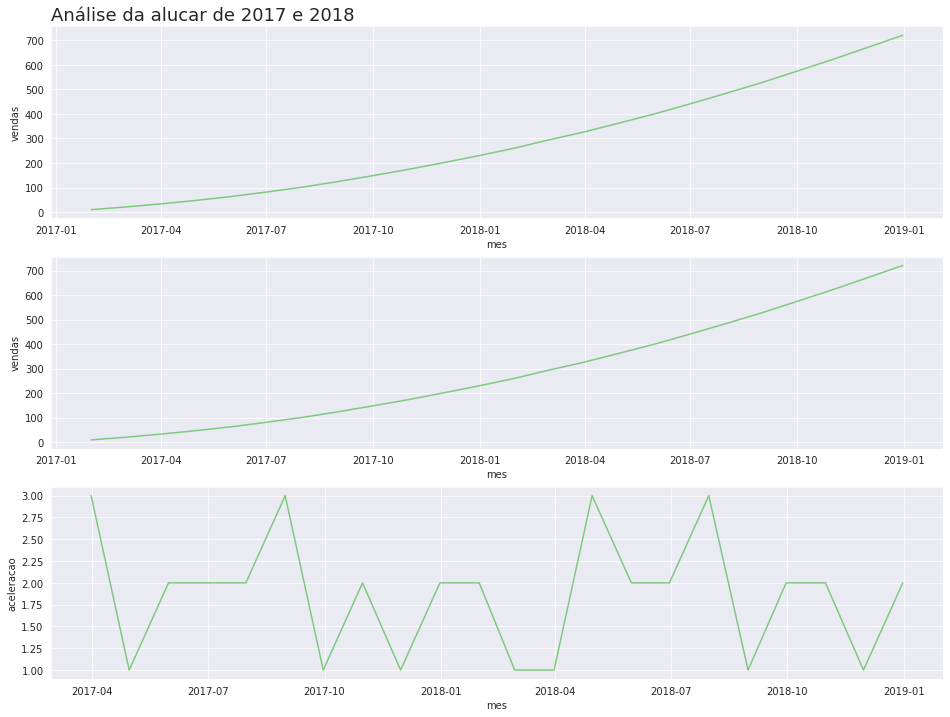

In [174]:
plt.figure(figsize=(16,12))
ax = plt.subplot(3,1,1)
ax.set_title('Análise da alucar de 2017 e 2018', fontsize=18,loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,2)
sns.lineplot(x='mes', y='vendas', data=alucar)
plt.subplot(3,1,3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)

In [175]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

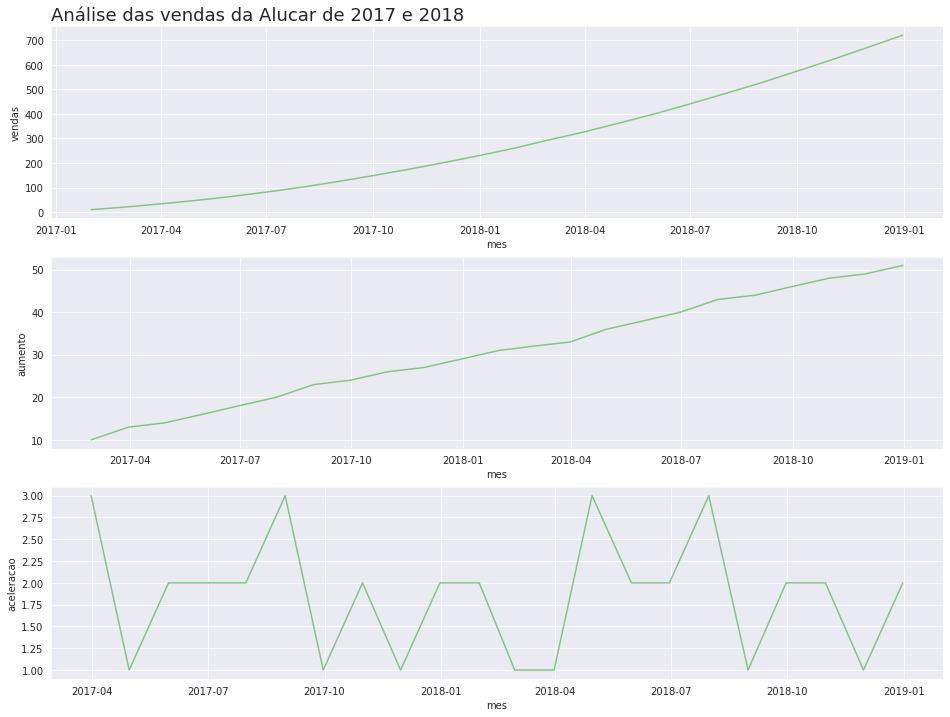

In [176]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao',
                alucar, 'Análise das vendas da Alucar de 2017 e 2018') 

In [177]:
from pandas.plotting import autocorrelation_plot

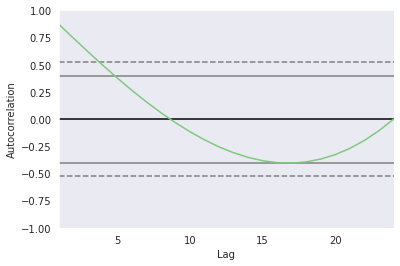

In [178]:
autocorrelation_plot(alucar['vendas'])

In [179]:
ax = plt.figure(figsize=(12,6))

<Figure size 864x432 with 0 Axes>

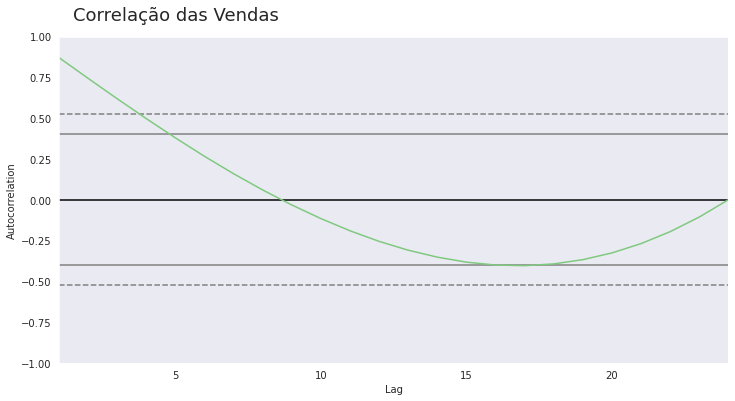

In [180]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Vendas', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['vendas'])
ax=ax

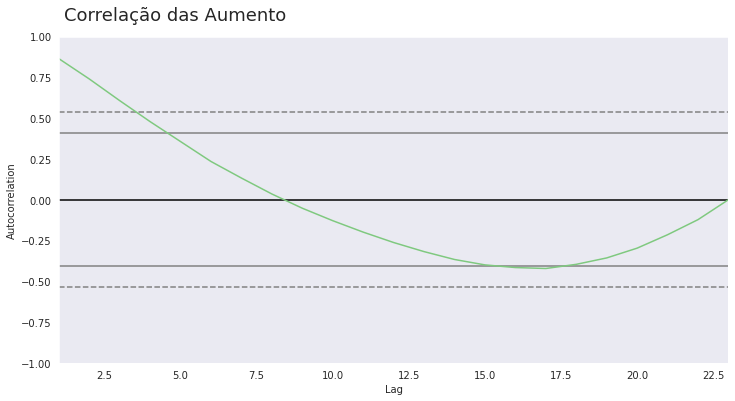

In [181]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aumento', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['aumento'][1:])
ax=ax

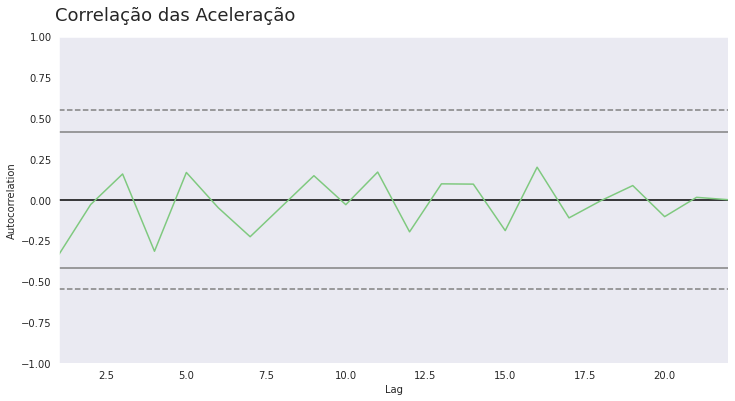

In [182]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das Aceleração', fontsize=18, x=0.26, y=0.95) 
autocorrelation_plot(alucar['aceleracao'][2:])
ax=ax

#**Alucar - Analisando assinantes da newsletter**

In [183]:
assinantes = pd.read_csv('newsletter_alucar.csv') 
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


In [184]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

In [185]:
print('Quantidade de linhas e colunas', assinantes.shape)
print('Quantidade de dados nulos', assinantes.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [186]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])

In [187]:
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

In [188]:
assinantes['aumento']= assinantes ['assinantes'].diff()
assinantes['aceleracao']= assinantes ['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


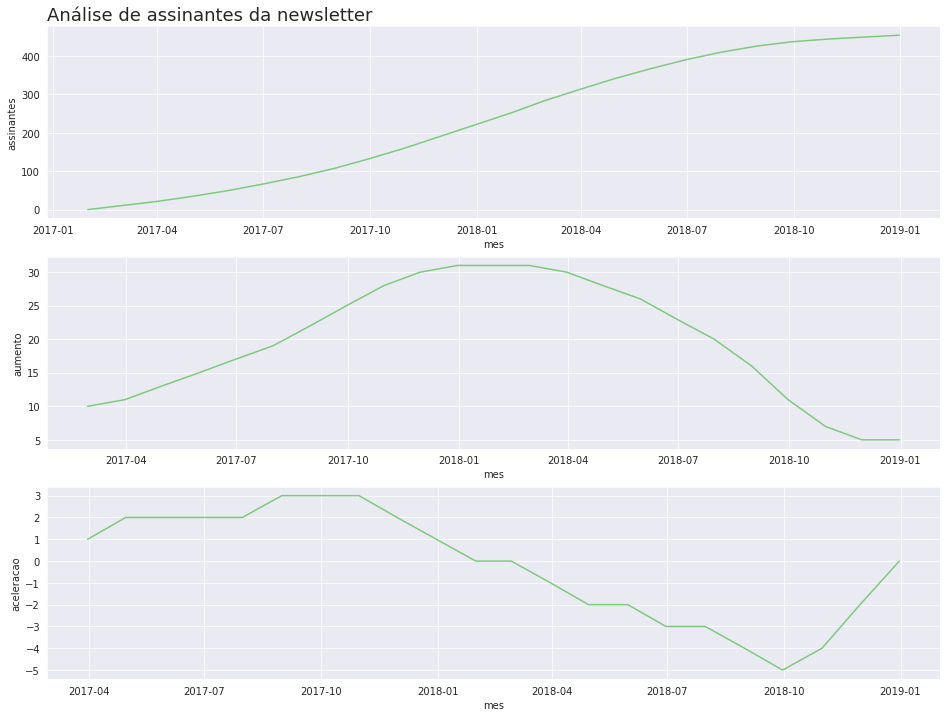

In [189]:
plot_comparacao('mes', 'assinantes', 'aumento', 'aceleracao', assinantes, 'Análise de assinantes da newsletter')

# **Chocolura - analisando as vendas**

In [190]:
chocolura = pd. read_csv('chocolura.csv')

In [191]:
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [192]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

In [193]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [194]:
print ('Quantidade de linhas:', chocolura.shape)
print ('Quantidade de dados nulos:', chocolura.isna().sum().sum())

Quantidade de linhas: (24, 2)
Quantidade de dados nulos: 0


In [195]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


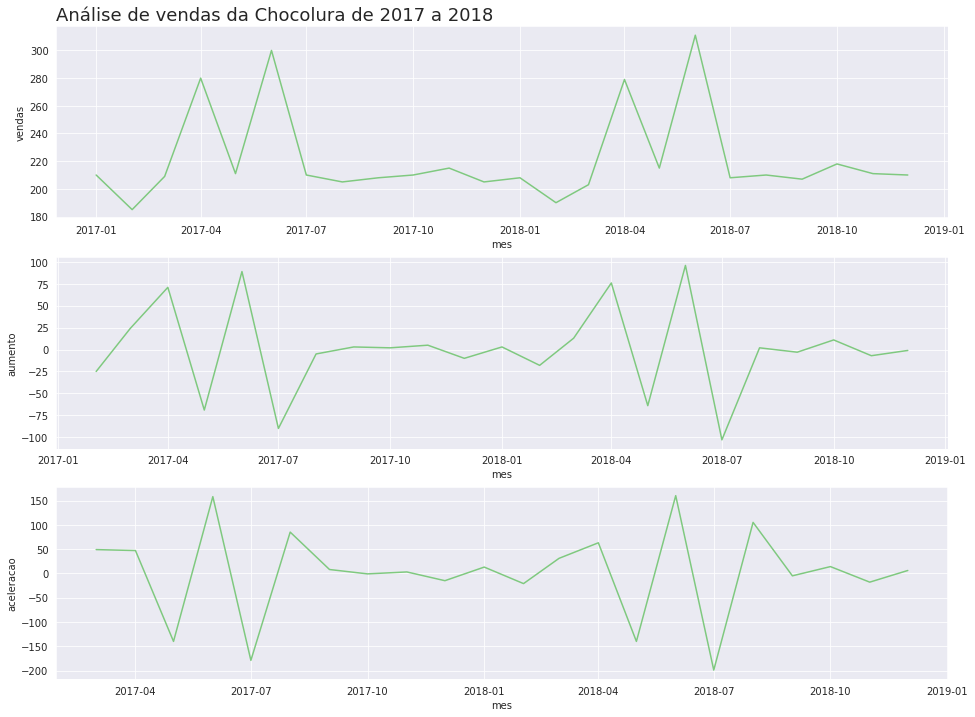

In [196]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas da Chocolura de 2017 a 2018')

#**Chocolura - Vendas diárias (Outubro e Novembro)**

In [197]:
vendas_por_dia = pd. read_csv('vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


In [198]:
print ('Quantidade de linhas:',vendas_por_dia.shape)
print ('Quantidade de dados nulos:', vendas_por_dia.isna().sum().sum())

Quantidade de linhas: (61, 2)
Quantidade de dados nulos: 0


In [199]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

In [200]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

In [201]:
vendas_por_dia['aumento']= vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao']= vendas_por_dia ['aumento'].diff()

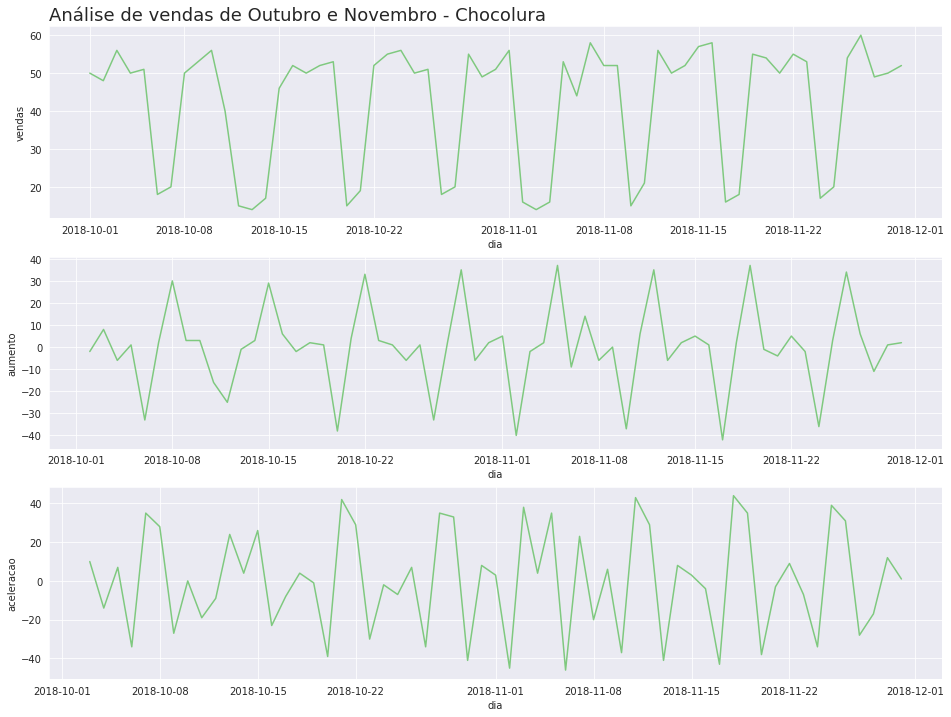

In [202]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', vendas_por_dia, 'Análise de vendas de Outubro e Novembro - Chocolura')

## **Analisando a sacionalidade**

In [203]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia ['dia'].dt.day_name()

In [204]:
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


In [205]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [206]:
dias_traduzidos = {'Monday': 'Segunda', 'Tuesday' : 'Terça', 'Wednesday':'Quarta', 'Thursday':'Quinta', 'Friday':'Sexta', 'Saturday':'Sábado', 'Sunday':'Domingo'}

In [207]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terça
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sábado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terça
9,2018-10-10,56,3.0,0.0,Quarta


In [208]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [209]:
vendas_agrupadas.head()

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0


In [210]:
vendas_agrupadas.head(7)

,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Sábado,16.0,-28.0,-20.0
Terça,52.0,-1.0,-34.0


**Correlação das Vendas diárias**

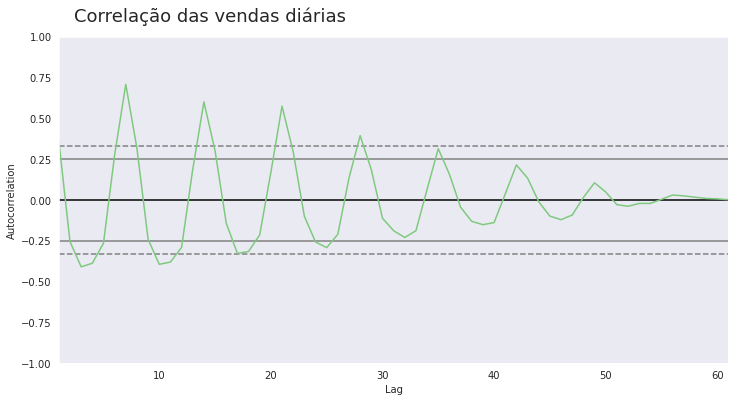

In [211]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax = ax

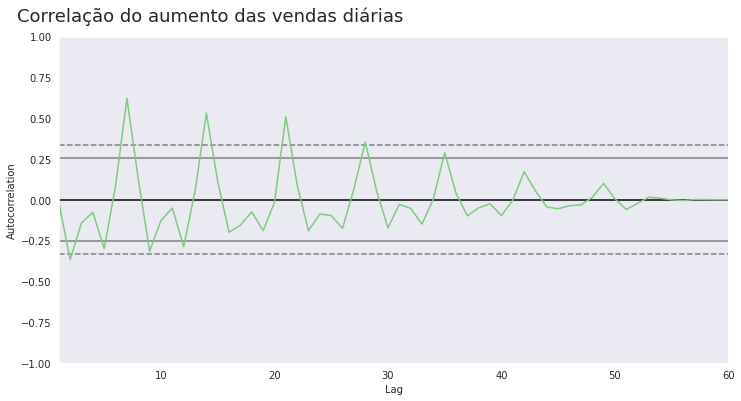

In [212]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax = ax

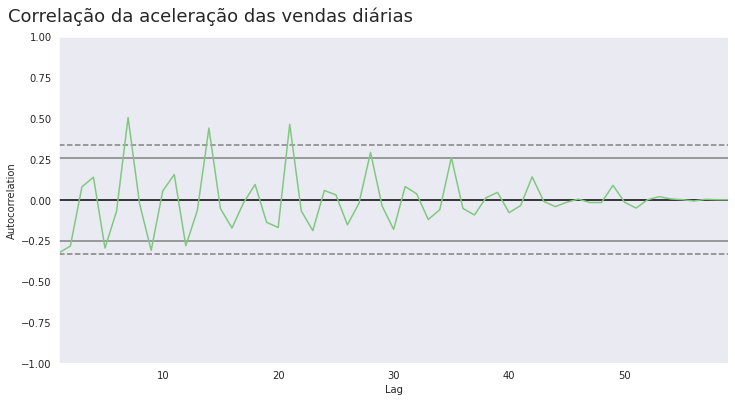

In [213]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax = ax

#**Cafelura - Análise de vendas**

In [214]:
cafelura = pd.read_csv('cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [215]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [216]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [217]:
print(f'Quantidade de linhas e colunas {cafelura.shape}')
print(f'Quantidade de dados nulos {cafelura.isna().sum().sum()}')

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


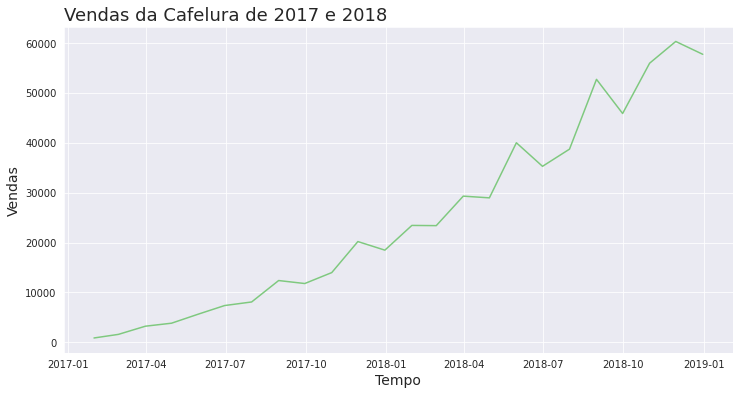

In [218]:
plotar('Vendas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas', 'mes', 'vendas', cafelura)

In [219]:
quantidade_de_dias_fds = pd.read_csv('dias_final_de_semana.csv')

In [220]:
quantidade_de_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [221]:
quantidade_de_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [222]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / quantidade_de_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


In [223]:
cafelura.dtypes

mes                    datetime64[ns]
vendas                          int64
vendas_normalizadas           float64
dtype: object

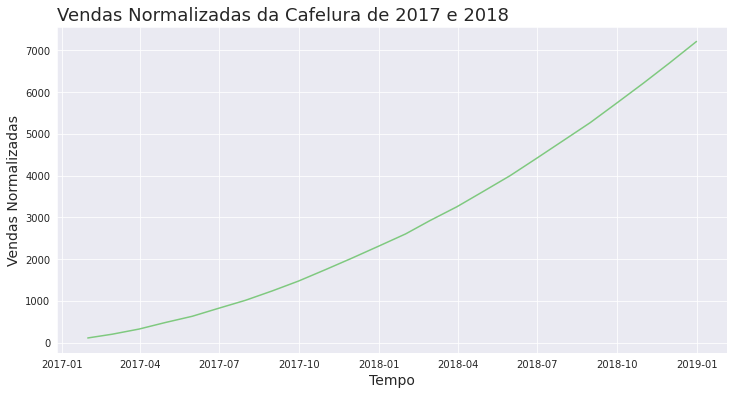

In [225]:
plotar('Vendas Normalizadas da Cafelura de 2017 e 2018', 'Tempo', 'Vendas Normalizadas', 'mes', 'vendas_normalizadas', cafelura)

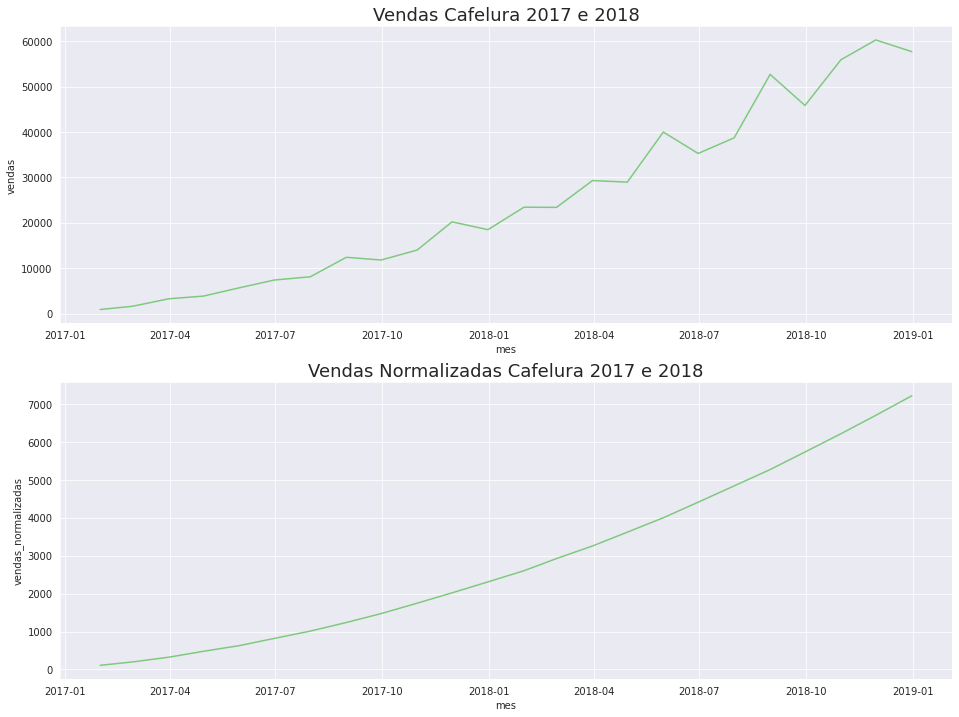

In [228]:
plt.figure(figsize=(16,12))
ax =plt.subplot(2,1,1)
ax.set_title('Vendas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas',data=cafelura)
ax =plt.subplot(2,1,2)
ax.set_title('Vendas Normalizadas Cafelura 2017 e 2018', fontsize=18)
sns.lineplot(x='mes',y='vendas_normalizadas',data=cafelura)
ax = ax

# **Statsmodels**

In [229]:
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


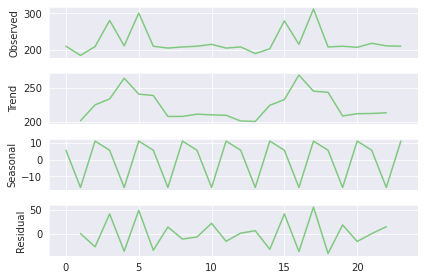

In [235]:
resultado = seasonal_decompose(chocolura['vendas'],freq=3)
ax = resultado.plot()

In [237]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [238]:
data = ({
       'observacao':observacao,
       'tendencia':tendencia, 
       'sazonalidade':sazonalidade,
       'ruido':ruido
})
resultado = pd.DataFrame(data)
resultado.head

<bound method NDFrame.head of     observacao   tendencia  sazonalidade      ruido
0          210         NaN      5.603175        NaN
1          185  201.333333    -16.730159   0.396825
2          209  224.666667     11.126984 -26.793651
3          280  233.333333      5.603175  41.063492
4          211  263.666667    -16.730159 -35.936508
5          300  240.333333     11.126984  48.539683
6          210  238.333333      5.603175 -33.936508
7          205  207.666667    -16.730159  14.063492
8          208  207.666667     11.126984 -10.793651
9          210  211.000000      5.603175  -6.603175
10         215  210.000000    -16.730159  21.730159
11         205  209.333333     11.126984 -15.460317
12         208  201.000000      5.603175   1.396825
13         190  200.333333    -16.730159   6.396825
14         203  224.000000     11.126984 -32.126984
15         279  232.333333      5.603175  41.063492
16         215  268.333333    -16.730159 -36.603175
17         311  244.666667     11.

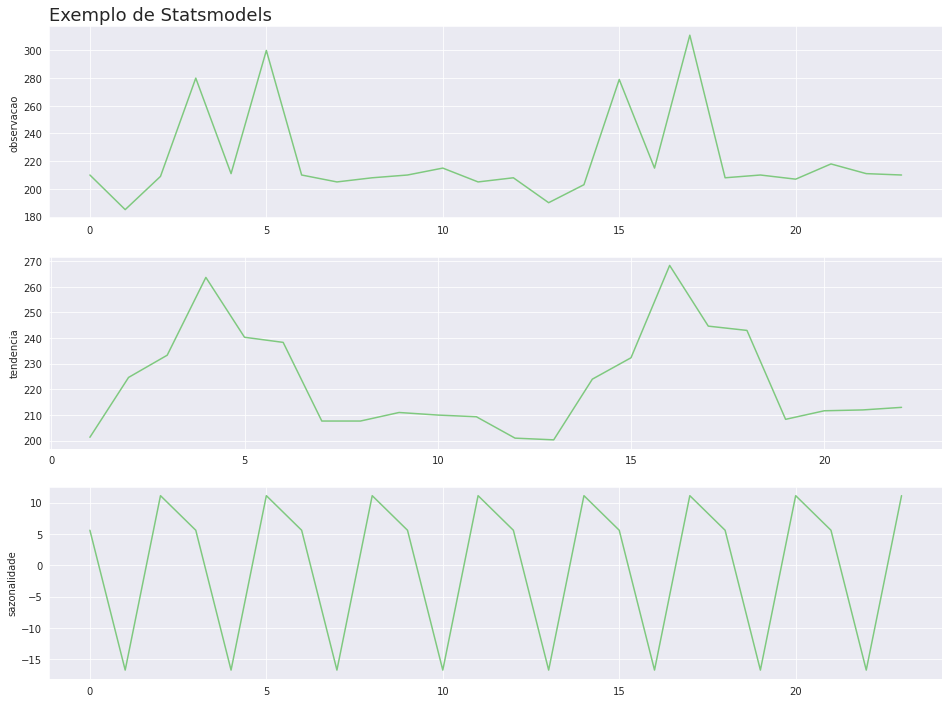

In [239]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'sazonalidade', resultado, 'Exemplo de Statsmodels')

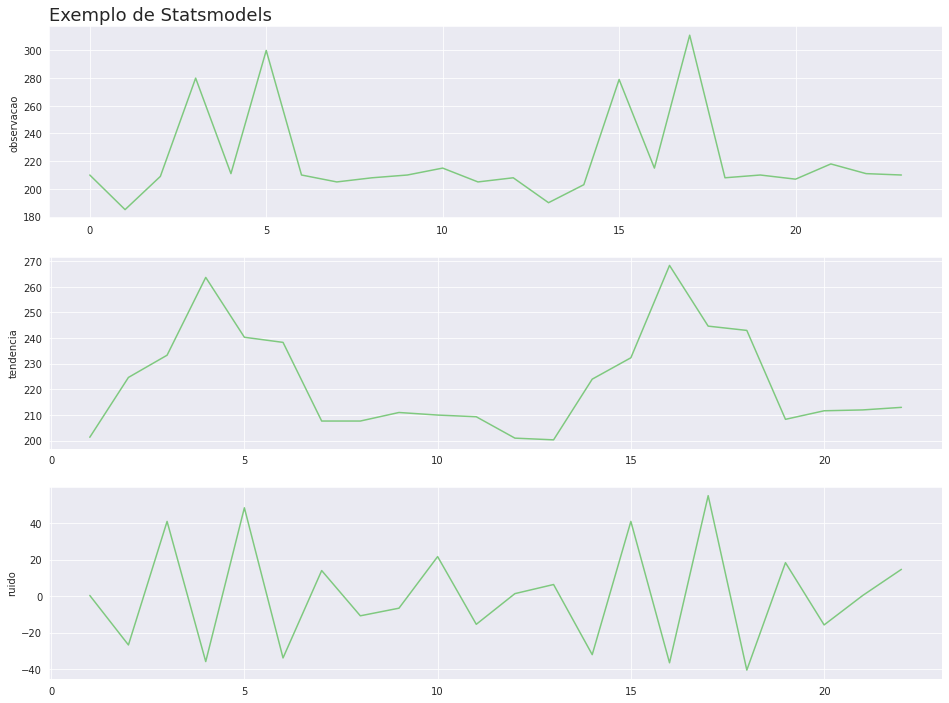

In [240]:
plot_comparacao(resultado.index, 'observacao', 'tendencia', 'ruido', resultado, 'Exemplo de Statsmodels')

# **Alucel - Análise de vendas**

In [241]:
alucel = pd.read_csv('alucel.csv')
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [242]:
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.dtypes

dia       datetime64[ns]
vendas           float64
dtype: object

In [243]:
print('Quantidade de linhas e colunas:', alucel.shape)
print('Quantidade de dados nulos:', alucel.isna().sum().sum())

Quantidade de linhas e colunas: (61, 2)
Quantidade de dados nulos: 0


In [244]:
alucel ['aumento'] = alucel ['vendas'].diff()
alucel ['aceleracao'] = alucel ['aumento'].diff()

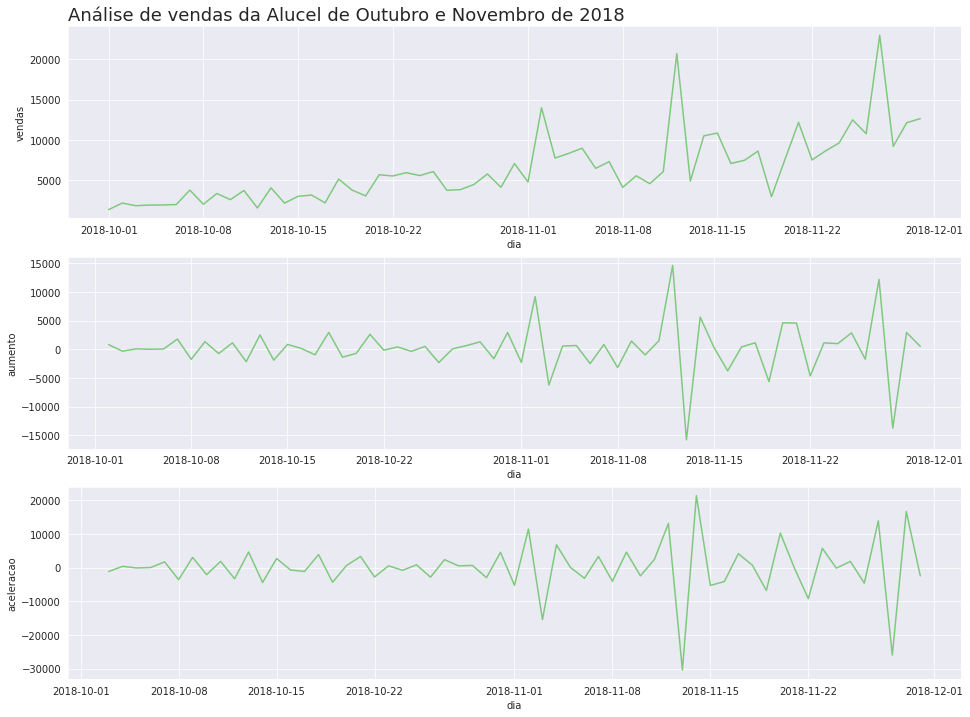

In [245]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da Alucel de Outubro e Novembro de 2018')

**Média Móvel**

In [246]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head()

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN


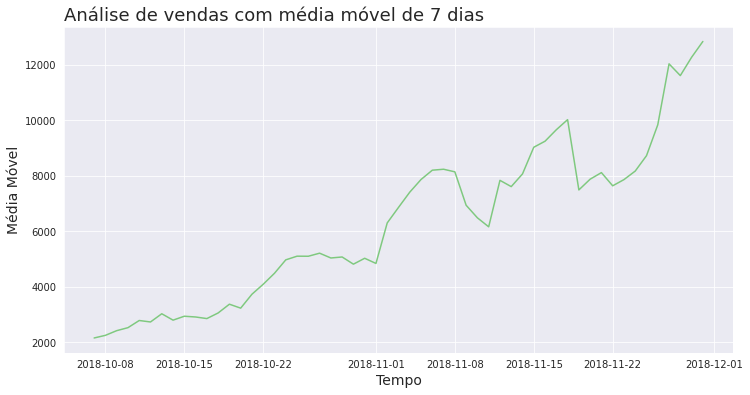

In [247]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [248]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

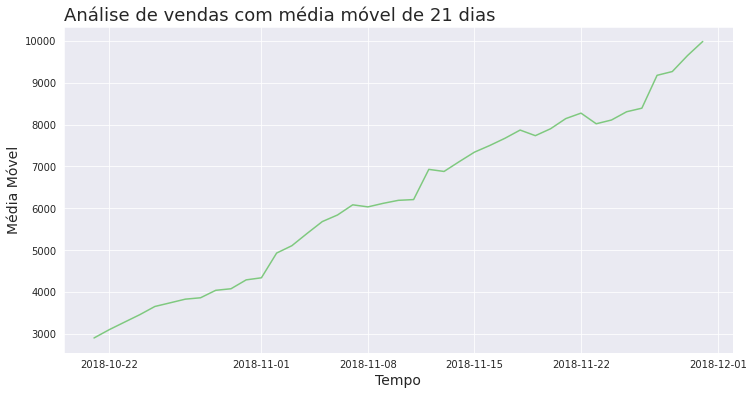

In [249]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

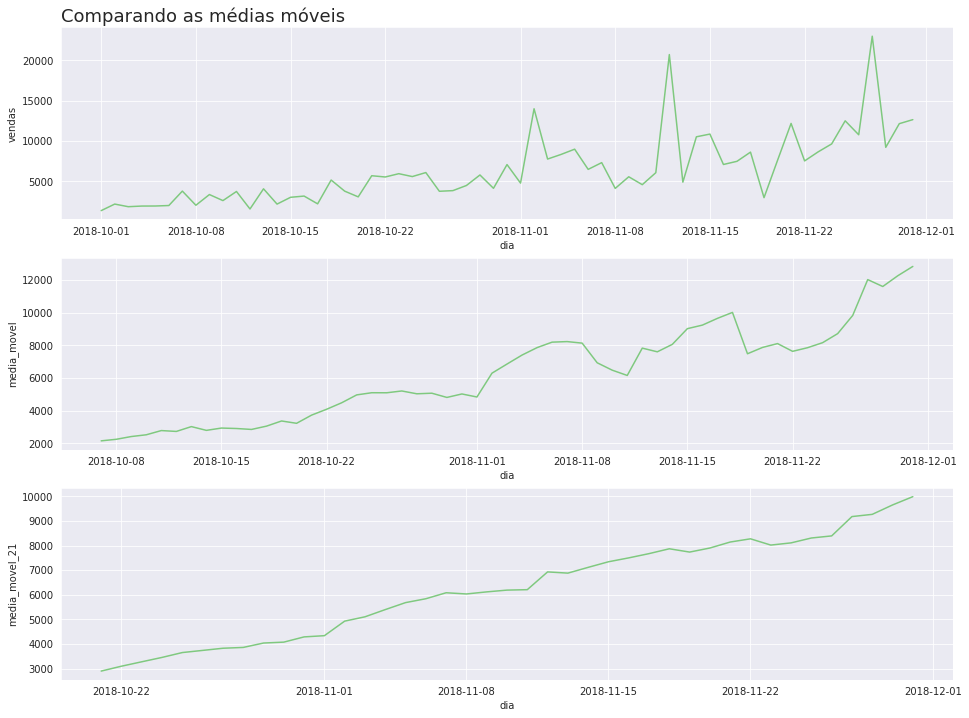

In [250]:
plot_comparacao('dia', 'vendas', 'media_movel', 'media_movel_21', alucel, 'Comparando as médias móveis')